## Lab Objectives
Line Hough Transform

#### Prepare

In [ ]:
!wget "https://drive.google.com/uc?export=view&id=1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a" -O paper_test.jpg

--2021-10-21 17:48:45--  https://drive.google.com/uc?export=view&id=1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a
Resolving drive.google.com (drive.google.com)... 142.250.107.101, 142.250.107.138, 142.250.107.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.107.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/brmvinnc6n9relhd71rpd2deg2vl4lj6/1634838525000/17396682441590382856/*/1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a?e=view [following]
--2021-10-21 17:48:46--  https://doc-00-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/brmvinnc6n9relhd71rpd2deg2vl4lj6/1634838525000/17396682441590382856/*/1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a?e=view
Resolving doc-00-7s-docs.googleusercontent.com (doc-00-7s-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-00-7s-docs.googleusercontent.com (doc-00-7s-docs

In [ ]:
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# remove grid lines
import numpy as np
import time, cv2, math
from typing import AnyStr, Any, Callable

In [ ]:
# funcrion to read and resize an image
def read_and_resize(filename: str, grayscale: bool = False, fx: float = 1.0, fy: float = 1.0):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      # convert to rgb
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    # resize
    if fx != 1.0 and fy != 1.0:
      img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result

    
def show_in_row(list_of_images: list, titles: list = None, disable_ticks: bool = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

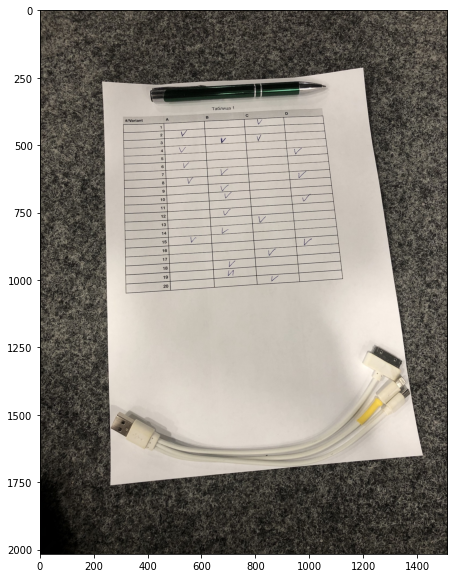

In [ ]:
img = read_and_resize("paper_test.jpg")
show_in_row([img])

### Find paper

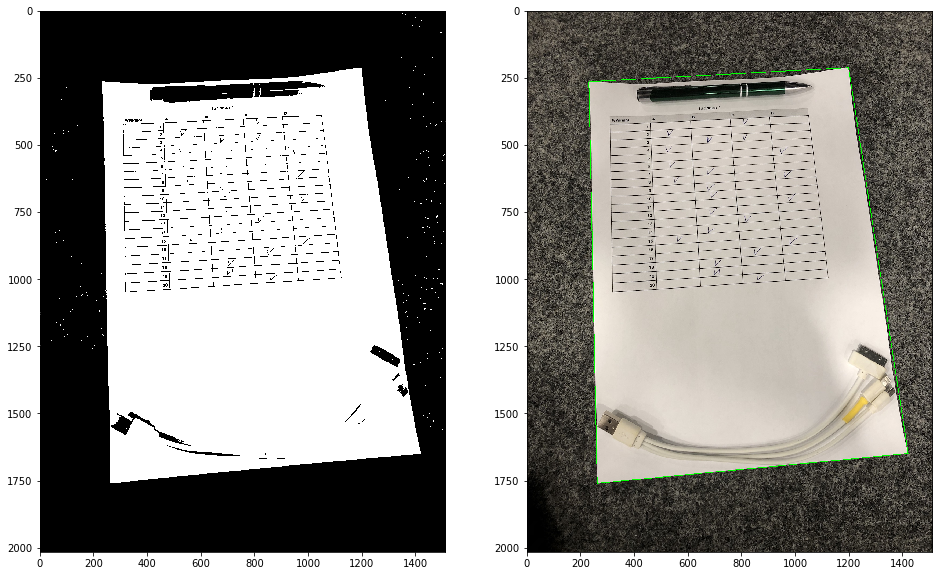

You are good


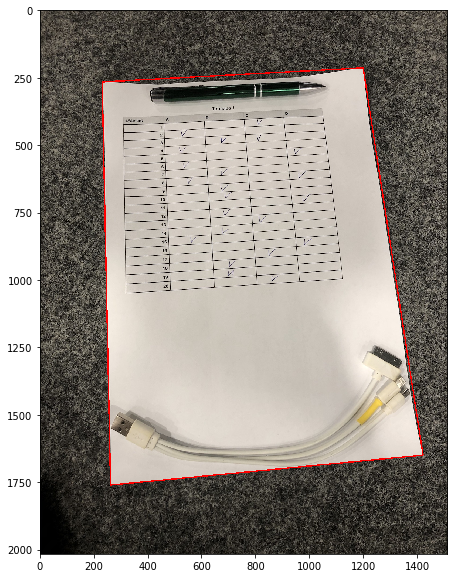

In [ ]:
#TODO
# Find paper corners

def find_paper_corners(color_img: np.array) -> np.array:
  # return np.array with shape (4, 2)
  # order: [top_left, top_right, bot_right, bot_left]

  gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
  gray_img = cv2.GaussianBlur(gray_img, None, 1.0)
  th, gray_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_OTSU)

  image, cnts, hierarchy = cv2.findContours(gray_img.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]

  screenCnt = None
  for c in cnts:
      peri = cv2.arcLength(c, True)
      approx = cv2.approxPolyDP(c, 0.1 * peri, True)

      if len(approx) == 4:
        screenCnt = approx
        break

  img_copy = color_img.copy()
  if screenCnt is not None:
    cv2.drawContours(img_copy, [screenCnt], -1, (0, 255, 0), 2)

  show_in_row([gray_img, img_copy])
  screenCnt = screenCnt.reshape((4, 2))
  screenCnt = screenCnt[::-1]
  screenCnt[:2], screenCnt[2:] = screenCnt[2:].copy(), screenCnt[:2].copy()

  return screenCnt.reshape((4, 2))

corners = find_paper_corners(img)
if corners.shape == (4, 2):
  print("You are good")
  img_copy = img.copy()
  cv2.polylines(img_copy, [corners], True, (255,0,0), 3)
  show_in_row([img_copy])
else:
  print("Shape must contains answer to the ultimate question of life")


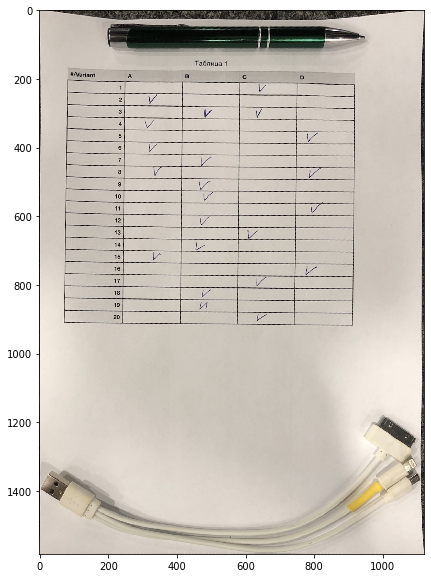

In [ ]:
# TODO

def undistort_perspective(img: np.array, corners: np.array, dst_size: tuple = (1120, 1584)) -> np.array:
  dst_points = np.array([[0, 0], [dst_size[0], 0], [dst_size[0], dst_size[1]], [0, dst_size[1]]], np.int32)
  h, status = cv2.findHomography(corners, dst_points)
  return cv2.warpPerspective(img, h, dst_size)

paper = undistort_perspective(img, corners)
show_in_row([paper])

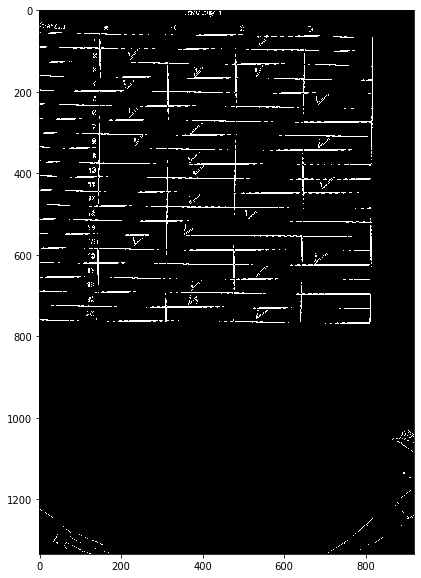

5 21


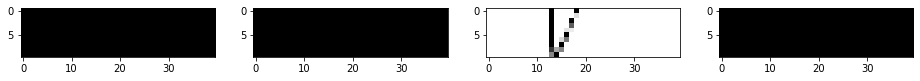

test [['C']]


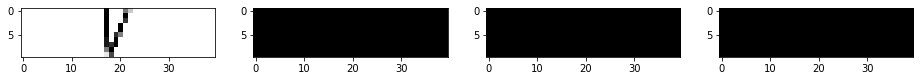

test [['C'], ['A']]


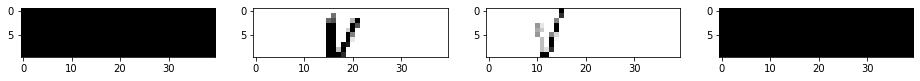

test [['C'], ['A'], ['B', 'C']]


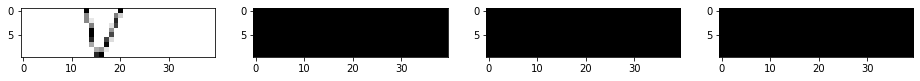

test [['C'], ['A'], ['B', 'C'], ['A']]


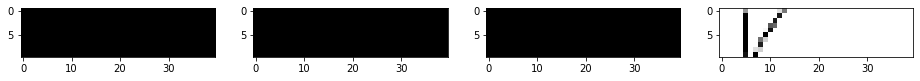

test [['C'], ['A'], ['B', 'C'], ['A'], ['D']]


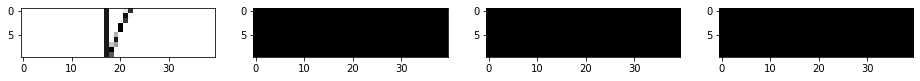

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A']]


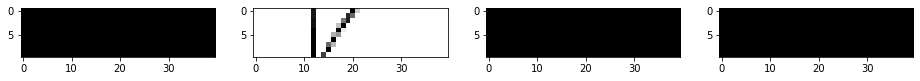

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B']]


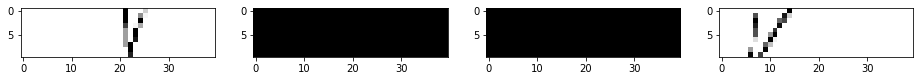

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D']]


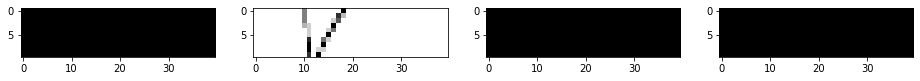

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B']]


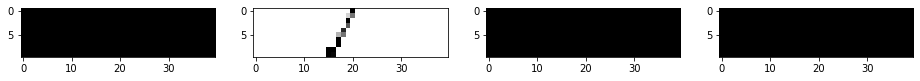

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B']]


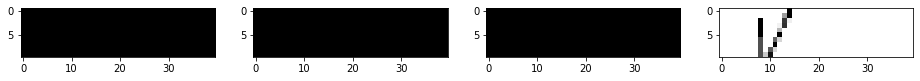

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D']]


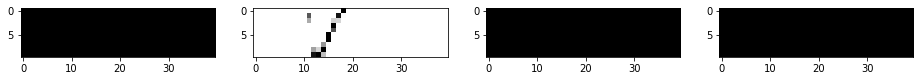

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B']]


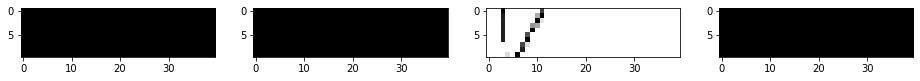

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B'], ['C']]


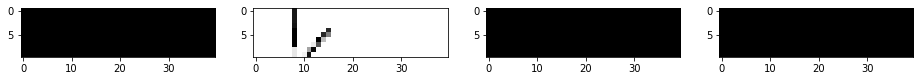

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B'], ['C'], ['B']]


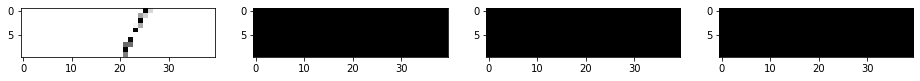

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B'], ['C'], ['B'], []]


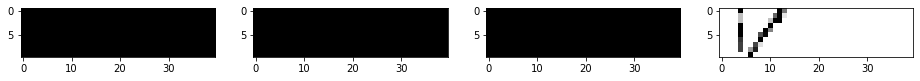

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B'], ['C'], ['B'], [], ['D']]


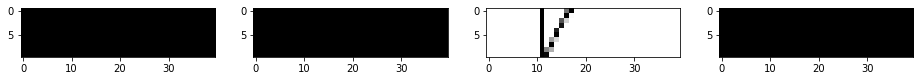

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B'], ['C'], ['B'], [], ['D'], ['C']]


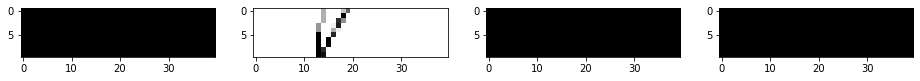

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B'], ['C'], ['B'], [], ['D'], ['C'], ['B']]


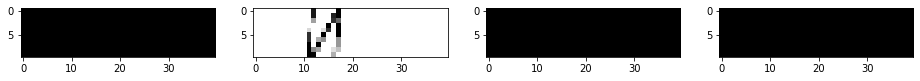

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B'], ['C'], ['B'], [], ['D'], ['C'], ['B'], ['B']]


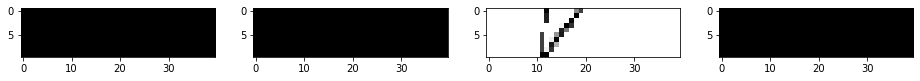

test [['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B'], ['C'], ['B'], [], ['D'], ['C'], ['B'], ['B'], ['C']]
[['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B'], ['C'], ['B'], [], ['D'], ['C'], ['B'], ['B'], ['C']]
Seams you've done


In [ ]:
def find_lines(color_img: np.array) -> (list, list):
  gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
  dst = cv2.Canny(gray_img, 200, 200, None, 3)
  # _, dst = cv2.threshold(gray_img, 160, 255, cv2.THRESH_BINARY_INV)
  show_in_row([dst])
  
  lines = cv2.HoughLines(dst, 3, np.pi / 90, 500)
  lines = sorted(lines, key=lambda x: x[0][0])
  
  v_lines = []
  h_lines = []
  if lines is not None:
    for i in range(0, len(lines)):
      rho = lines[i][0][0]
      theta = lines[i][0][1]
      ang = theta * 180 / math.pi
      if ang > 45:
        h_lines.append((rho, theta))
      else:
        v_lines.append((rho, theta))

  return (v_lines, h_lines)

def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    rho1, theta1 = line1
    rho2, theta2 = line2
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return [x0, y0]

def check_is_filled(cell: np.array) -> bool:
  center_cell = cell[5:-5, 5:-5]
  s = np.sum(center_cell)
  sa = center_cell.shape[0] * center_cell.shape[1] * 255
  return (s / sa) < 0.98

def find_answers(color_img: np.array, deubg: bool = False) -> list:
  # return in format [[A], [B, C], [], [A], ..]

  (v_lines, h_lines) = find_lines(color_img)
  gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
  _, gray_img = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY)
  print(len(v_lines), len(h_lines))
  if debug:
    debug_img = color_img.copy()
  indexes_answers = ['A', 'B', 'C', 'D']
  answers = []

  for h_idx in range(1, len(h_lines)):
    cells = []
    row_answers = []
    for v_idx in range(1, len(v_lines)):
      tl = intersection(h_lines[h_idx-1], v_lines[v_idx-1])
      tr = intersection(h_lines[h_idx-1], v_lines[v_idx])
      br = intersection(h_lines[h_idx], v_lines[v_idx])
      bl = intersection(h_lines[h_idx], v_lines[v_idx-1])
      poly = np.array([tl, tr, br, bl])
      cell = undistort_perspective(gray_img, poly, (50, 20))
      if check_is_filled(cell):
        row_answers.append(indexes_answers[v_idx-1])

      if debug:
        cells.append(cell[5:-5, 5:-5])
        cv2.polylines(debug_img, [np.array(poly)], True, (255,0,0), 3)

    show_in_row(cells)
    answers.append(row_answers)
    # return []
  return answers

answers = find_answers(paper[150:-100,100:-100])
print("Result =", answers)
if len(answers) == 20 and answers[0] == ['C']:
  print("Seams you've done")
else:
  print("TODO")